# Iris dataset

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data = data.drop(["Id"],axis=1)

# Exploratory Data Analysis

In [4]:
data 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe() #From the result it is evident that feature scaling is not required,as all of the feature mean and std are not distant to each other

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Dataset balance check(Target)
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
#Checking whether the target column is balanced

data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:>

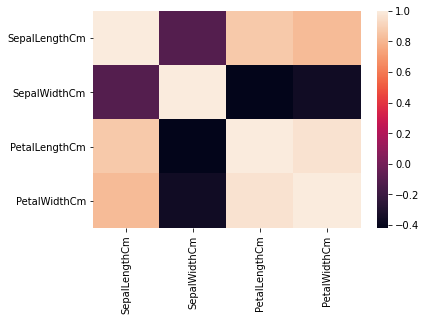

In [10]:
sns.heatmap(data.corr())#From the heatmap it is evident that all the features except SepalWidth are highly correlated to the target("Species")

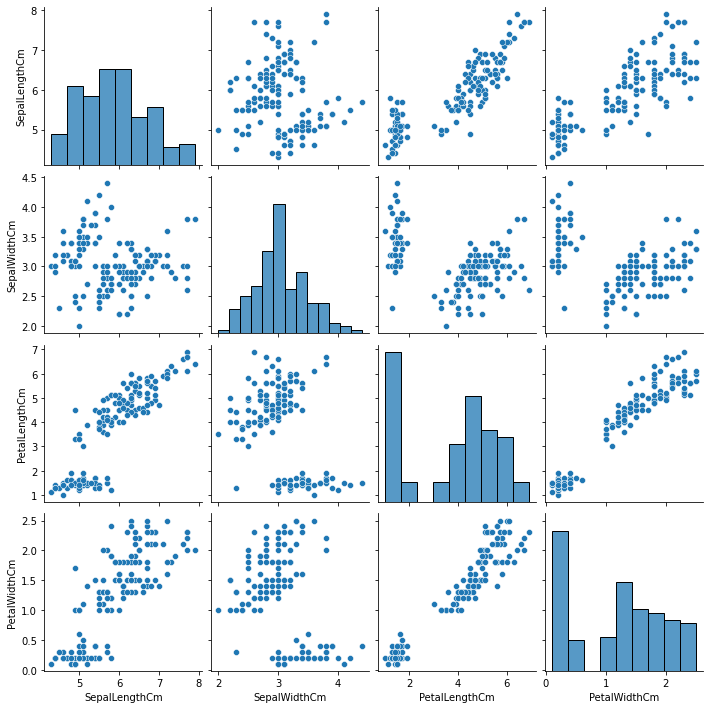

In [11]:
sns.pairplot(data)

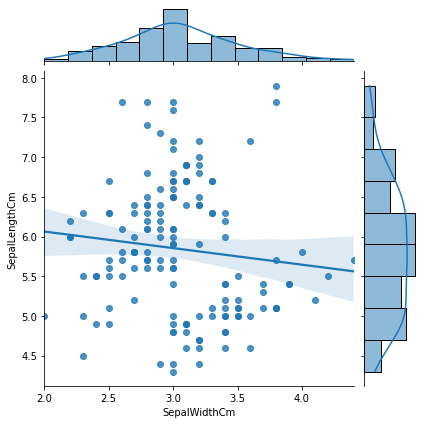

In [54]:
sns.jointplot(x="SepalWidthCm",y='SepalLengthCm',data = data , kind = "reg")

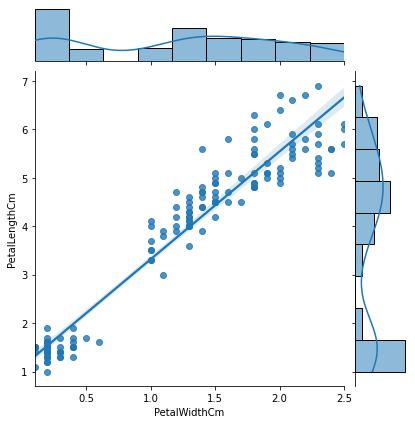

In [55]:
sns.jointplot(x="PetalWidthCm",y='PetalLengthCm',data = data , kind = "reg")

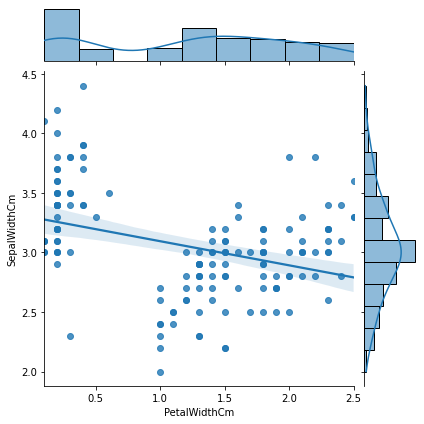

In [56]:
sns.jointplot(x="PetalWidthCm",y='SepalWidthCm',data = data , kind = "reg")

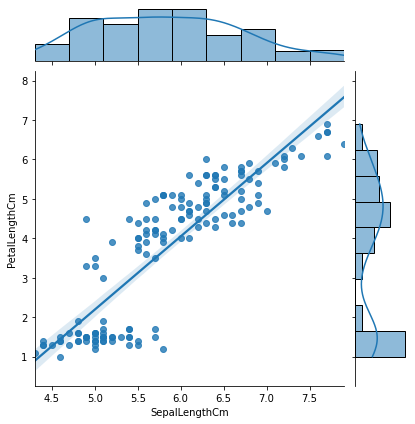

In [57]:
sns.jointplot(x="SepalLengthCm",y='PetalLengthCm',data = data , kind = "reg")

Text(0.5, 1.0, 'Category vs SepalWidth')

<Figure size 864x432 with 0 Axes>

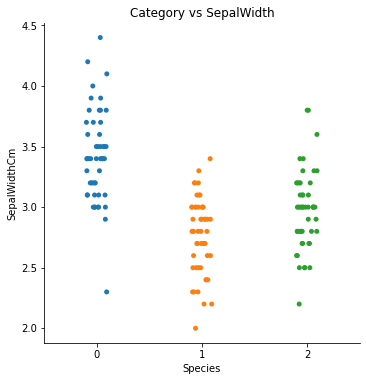

In [58]:
plt.figure(figsize=(12,6))
sns.catplot(x = "Species" , y = "SepalWidthCm" , data = data)
plt.title("Category vs SepalWidth" , size =12)

Text(0.5, 1.0, 'Category vs SepalLength')

<Figure size 864x432 with 0 Axes>

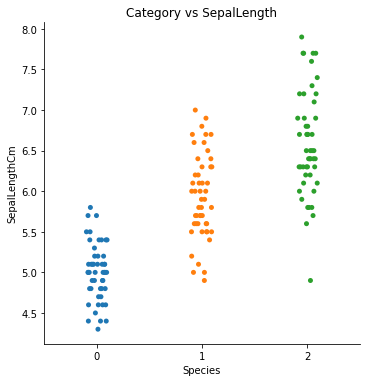

In [59]:
plt.figure(figsize=(12,6))
sns.catplot(x = "Species" , y = "SepalLengthCm" , data = data)
plt.title("Category vs SepalLength" , size =12)

Text(0.5, 1.0, 'Category vs PetalWidth')

<Figure size 864x432 with 0 Axes>

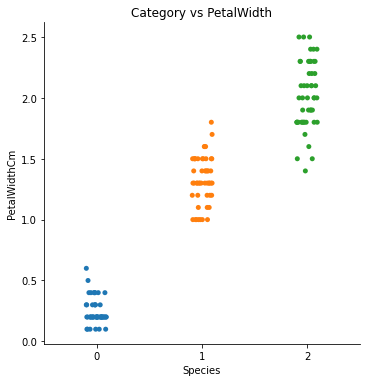

In [60]:
plt.figure(figsize=(12,6))
sns.catplot(x = "Species" , y = "PetalWidthCm" , data = data)
plt.title("Category vs PetalWidth" , size =12)

Text(0.5, 1.0, 'Category vs PetalLength')

<Figure size 864x432 with 0 Axes>

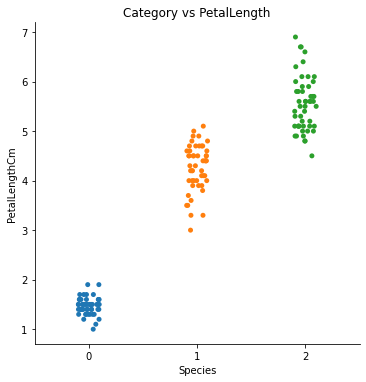

In [61]:
plt.figure(figsize=(12,6))
sns.catplot(x = "Species" , y = "PetalLengthCm" , data = data)
plt.title("Category vs PetalLength" , size =12)

# Feature Engineering

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["Species"] = encoder.fit_transform(data["Species"])

In [21]:
y = data["Species"]
train = data.drop(["Species"],axis=1)

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,y_train.shape #(120,1)

((120, 4), (120,))

In [24]:
x_test.shape,y_test.shape

((30, 4), (30,))

# Fitting the model and evaluating

In [45]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

SVC()

In [46]:
svc.score(x_train,y_train)

0.975

In [47]:
svc.score(x_test,y_test)

1.0

In [49]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(x_test)
confusion_matrix(y_test,y_pred).ravel()

array([10,  0,  0,  0,  9,  0,  0,  0, 11], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
clf.score(x_train,y_train)

1.0

In [52]:
clf.score(x_test,y_test)

1.0

In [53]:
y_pred_ = svc.predict(x_test)
confusion_matrix(y_test,y_pred_).ravel()

array([10,  0,  0,  0,  9,  0,  0,  0, 11], dtype=int64)